<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#largest-number-of-fans-and-blotches" data-toc-modified-id="largest-number-of-fans-and-blotches-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>largest number of fans and blotches</a></span></li><li><span><a href="#parameter_scan" data-toc-modified-id="parameter_scan-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>parameter_scan</a></span></li><li><span><a href="#pipeline-examples" data-toc-modified-id="pipeline-examples-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>pipeline examples</a></span></li></ul></div>

In [3]:
from planet4 import plotting, catalog_production

In [4]:
rm = catalog_production.ReleaseManager('v1.0b4')

In [5]:
fans = rm.read_fan_file()
blotches = rm.read_blotch_file()

In [6]:
cols = ['angle', 'distance', 'tile_id', 'marking_id',
       'obsid', 'spread', 
       'l_s', 'map_scale', 'north_azimuth',
       'PlanetographicLatitude',
       'PositiveEast360Longitude']

In [7]:
fans.head()

,angle,distance,tile_id,image_x,image_y,marking_id,n_votes,obsid,spread,version,...,y_angle,l_s,map_scale,north_azimuth,BodyFixedCoordinateX,BodyFixedCoordinateY,BodyFixedCoordinateZ,PlanetocentricLatitude,PlanetographicLatitude,PositiveEast360Longitude
0,205.56,179.71,APF0000ci9,2270.76,24336.16,F039765,35,ESP_012079_0945,88.03,1,...,-0.43,214.784691,0.25,126.856883,-65.804336,261.407884,-3370.504345,-85.427383,-85.480830,104.129523
1,185.39,179.62,APF0000cia,3391.21,5640.60,F039766,15,ESP_012079_0945,21.35,1,...,-0.09,214.784691,0.25,126.856883,-67.219114,257.011589,-3370.631413,-85.493546,-85.546226,104.656897
2,184.98,500.27,APF0000cia,3509.96,5876.70,F039767,10,ESP_012079_0945,18.91,1,...,-0.09,214.784691,0.25,126.856883,-67.170611,257.055226,-3370.630794,-85.493039,-85.545725,104.644396
3,184.29,105.43,APF0000cia,3716.27,5824.50,F039769,6,ESP_012079_0945,26.41,1,...,-0.07,214.784691,0.25,126.856883,-67.127761,257.024926,-3370.635002,-85.493723,-85.546401,104.637107
4,189.42,109.50,APF0000cia,3452.17,6033.00,F03976a,3,ESP_012079_0945,22.58,1,...,-0.16,214.784691,0.25,126.856883,-67.169940,257.096267,-3370.628302,-85.492368,-85.545061,104.642019


In [8]:
fans[cols].rename(dict(PlanetographicLatitude='Latitude',
                       PositiveEast360Longitude='Longitude'),
                  axis=1).head()

,angle,distance,tile_id,marking_id,obsid,spread,l_s,map_scale,north_azimuth,Latitude,Longitude
0,205.56,179.71,APF0000ci9,F039765,ESP_012079_0945,88.03,214.784691,0.25,126.856883,-85.480830,104.129523
1,185.39,179.62,APF0000cia,F039766,ESP_012079_0945,21.35,214.784691,0.25,126.856883,-85.546226,104.656897
2,184.98,500.27,APF0000cia,F039767,ESP_012079_0945,18.91,214.784691,0.25,126.856883,-85.545725,104.644396
3,184.29,105.43,APF0000cia,F039769,ESP_012079_0945,26.41,214.784691,0.25,126.856883,-85.546401,104.637107
4,189.42,109.50,APF0000cia,F03976a,ESP_012079_0945,22.58,214.784691,0.25,126.856883,-85.545061,104.642019


In [9]:
fans.columns

Index(['angle', 'distance', 'tile_id', 'image_x', 'image_y', 'marking_id',
       'n_votes', 'obsid', 'spread', 'version', 'vote_ratio', 'x', 'x_angle',
       'y', 'y_angle', 'l_s', 'map_scale', 'north_azimuth',
       'BodyFixedCoordinateX', 'BodyFixedCoordinateY', 'BodyFixedCoordinateZ',
       'PlanetocentricLatitude', 'PlanetographicLatitude',
       'PositiveEast360Longitude'],
      dtype='object')

In [6]:
fan_counts = fans.groupby('tile_id').size()
blotch_counts = blotches.groupby('tile_id').size()

In [7]:
ids = fan_counts[fan_counts > 4][fan_counts < 10].index

In [8]:
pure_fans = list(set(ids) - set(blotches.tile_id))

In [9]:
len(ids)

3455

In [10]:
len(pure_fans)

871

In [11]:
rm.savefolder

PosixPath('/Users/klay6683/Dropbox/data/planet4/P4_catalog_v1.0b4')

In [12]:
%matplotlib ipympl

In [21]:
plt.close('all')

In [14]:
from ipywidgets import interact

In [15]:
id_ = pure_fans[51]

In [16]:
def do_plot(i):
    id_ = pure_fans[i]
    plotting.plot_image_id_pipeline(id_, datapath=rm.savefolder, via_obsid=False,
                                    save=True, figsize=(8,4),
                                    saveroot='/Users/klay6683/Dropbox/src/p4_paper1/figures')

In [23]:
interact(do_plot, i=48)

interactive(children=(IntSlider(value=48, description='i', max=144, min=-48), Output()), _dom_classes=('widget-interact',))

<function __main__.do_plot>

In [17]:
from planet4 import markings

In [26]:
def do_plot(i=0):
    plt.close('all')
    fig, ax = plt.subplots()
    markings.ImageID(pure_fans[i]).show_subframe(ax=ax)
    ax.set_title(pure_fans[i])

In [27]:
interact(do_plot, i=(0,len(pure_fans),1))

interactive(children=(IntSlider(value=0, description='i', max=871), Output()), _dom_classes=('widget-interact',))

<function __main__.do_plot>

In [28]:
markings.ImageID('6n3').image_name

'ESP_011296_0975'

In [18]:
from planet4 import markings

In [20]:
markings.ImageID(pure_fans[15]).image_name

'ESP_011921_0950'

In [22]:
plotting.plot_raw_fans(id_)

FigureCanvasNbAgg()

In [23]:
plotting.plot_finals(id_, datapath=rm.savefolder)

FigureCanvasNbAgg()

# largest number of fans and blotches 

In [42]:
g_id = fans.groupby('tile_id')

In [43]:
g_id.size().sort_values(ascending=False).head()

tile_id
APF00006mr    167
APF0000ay0    159
APF0000q3x    135
APF0000at2    128
APF0000hyn    127
dtype: int64

In [44]:
blotches.groupby('tile_id').size().sort_values(ascending=False).head()

tile_id
APF00007t9    278
APF00007gm    244
APF00007ob    239
APF00007r9    221
APF00007nm    221
dtype: int64

In [45]:
plotting.plot_finals('6mr', datapath=rm.savefolder)

FigureCanvasNbAgg()

In [46]:
plotting.plot_finals('7t9', datapath=rm.savefolder)

FigureCanvasNbAgg()

# parameter_scan

In [10]:
from planet4 import dbscan

In [11]:
db = dbscan.DBScanner()

In [12]:
import seaborn as sns
sns.set_context('paper')

In [13]:
db.parameter_scan(id_, 'fan', [0.13, 0.2], [10, 20, 30], size_to_scan='small')

NameError: name 'id_' is not defined

# pipeline examples

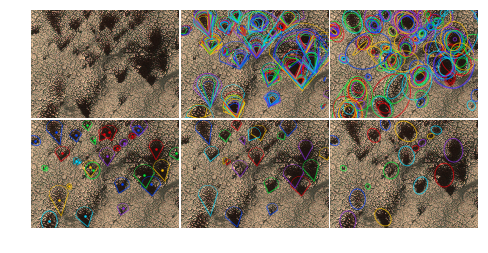

In [14]:
plotting.plot_image_id_pipeline('bk7', datapath=rm.savefolder, via_obsid=False,
                                    save=True, figsize=(8,4), do_title=False,
                                    saveroot='/Users/klay6683/Dropbox/src/p4_paper1/figures')

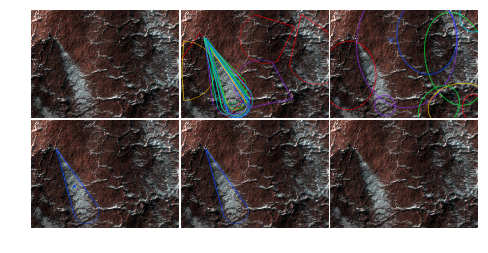

In [15]:
plotting.plot_image_id_pipeline('ops', datapath=rm.savefolder, via_obsid=False,
                                    save=True, figsize=(8,4), do_title=False,
                                    saveroot='/Users/klay6683/Dropbox/src/p4_paper1/figures')

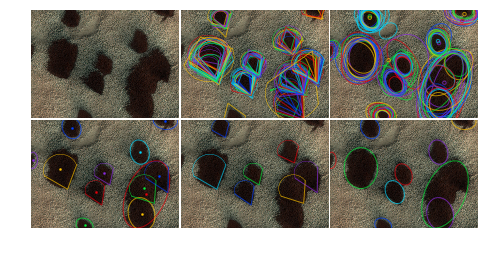

In [16]:
plotting.plot_image_id_pipeline('b0t', datapath=rm.savefolder, via_obsid=False,
                                    save=True, figsize=(8,4), do_title=False,
                                    saveroot='/Users/klay6683/Dropbox/src/p4_paper1/figures')

# ROIs map

In [18]:
from astropy.table import Table
tab = Table.read('/Users/klay6683/Dropbox/src/p4_paper1/rois_table.tex')

In [21]:
rois = tab.to_pandas()

In [24]:
rois.drop(0, inplace=True)

In [25]:
rois.head()

,\textbf{Latitude},\textbf{Longitude},\textbf{Informal Name},\textbf{ \# of Images},\textbf{\# of Images}
1,-73.53,339.5,Binghamton,2,0
2,-74.22,168.5,Caterpillar,1,0
3,-81.38,295.8,Inca City,7,7
4,-81.46,296.3,Inca City Ridges,7,8
5,-81.68,66.3,Potsdam,7,9


In [26]:
rois.columns = ['Latitude', 'Longitude', 'Informal Name', '# Images (MY29)', '# Images (MY30)'] 

In [27]:
rois.head()

,Latitude,Longitude,Informal Name,# Images (MY29),# Images (MY30)
1,-73.53,339.5,Binghamton,2,0
2,-74.22,168.5,Caterpillar,1,0
3,-81.38,295.8,Inca City,7,7
4,-81.46,296.3,Inca City Ridges,7,8
5,-81.68,66.3,Potsdam,7,9


In [28]:
rois.to_csv('/Users/klay6683/Dropbox/data/planet4/p4_analysis/rois.csv')